# Breast Cancer Diagnosis
By Ainhoa Arnaiz

Among woman, breast cancer is the most common type of cancer worldwide. Each year, around 2 million women are diagnosed and at least a quarter or them passes away. Thus, developing efficient diagnosis solutions its very important, since early detection helps in reducing the number of early deaths drastically. 

#### About the dataset
Dataset: https://www.kaggle.com/aryashah2k/breast-ultrasound-images-dataset
Created by Al-Dhabyani W, Gomaa M, Khaled H, Fahmy A. Dataset of breast ultrasound images. Data in Brief. 2020 Feb;28:104863. DOI: 10.1016/j.dib.2019.104863.

This data was collected in 2018. The data collected at baseline include breast ultrasound images among women in ages between 25 and 75 years old. The number of patients is 600 female patients. The dataset consists of 780 images with an average image size of 500*500 pixels. The images are in PNG format. The ground truth images (mask images) are presented with original images. The images are categorized into three classes, which are benign (437 images), malignant (210 images) and normal (133 images).

This dataset can produce great results in classification, detection, and segmentation of breast cancer when combined with machine learning.

#### Index
- Part 1
    - Loading, analyzing and processing the dataset
        - Analyzing the images in the folder
        - Creating the dataset and the labels from the images in the folder
        - Converting text labels to numeric codes
        - Converting numeric codes to text labels
    - Classification and Performace Measures
        - Splitting the dataset (train and test)
        - Running Naïve Bayes Classifier
        - Confusion Matrix
        - Precision, Recall and F measure
        - Prediction example
    - Classification with most correlating features
        - Finding most correlating features (pixels)
        - Creating datasets (top 6, 15 and 30)
        - Running Naïve Bayes in Dataset 1
        - Running Naïve Bayes in Dataset 2
        - Running Naïve Bayes in Dataset 3
    - Conclusions
- Part 2
    - Clustering and Performace Measures
        - Types of clustering
        - Splitting the dataset (train and test)
        - K-Means (centroid model)
        - Hierarchical Clustering (connectivity model)
        - Expectation-Maximization Algorithm (distribution model)
        - Performance measures comparison
    - Optimizing the algorithm
        - Changing the number of clusters manually (K-Means)
        - Elbow Method
        - Optimal number of clusters
    - Conclusions
        - Differences between clustering algorithms
        - Comparing K-Means clustering to Bayesian classification
- Part 3
    - Classification and Performace Measures
        - Splitting the dataset (train and test)
        - Running J48 Classifier
        - Major Metrics (using 10-fold cross-validation)
        - Major Metrics (using test set)
    - Changing Parameters
        - Pruning - changing the size of the tree
        - Changing training and test set to 40-60 ratio
        - Changing training and test set to 10-90 ratio
    - Extra - Random Forests
        - Splitting the dataset (train and test)
        - Running Random Forests Classifier and Mayor Metrics (using test set)
        - Changing the size of the forest/tree
        - Changing training and test set to 40-60 ratio
        - Changing training and test set to 10-90 ratio
- Part 4
    - Linear classifier - Logistic Regression
    - Multi Layer Perceptron
    - Convolutional Neural Networks
    

In [8]:
import pandas as pd
import numpy as np
import os
import cv2
from PIL import Image

%matplotlib inline
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl

import random
import warnings
warnings.filterwarnings('ignore')

## Part 1
### Loading, analyzing and processing the dataset

#### Analyzing the images in the folder
As mentioned before, the dataset consists of 780 images with an average image size of 500*500 pixels. Each ultrasound also comes with one (or various, depending on how many tumors) ground truth image that clarifies the position of the tumor, as can been seen in the example below.

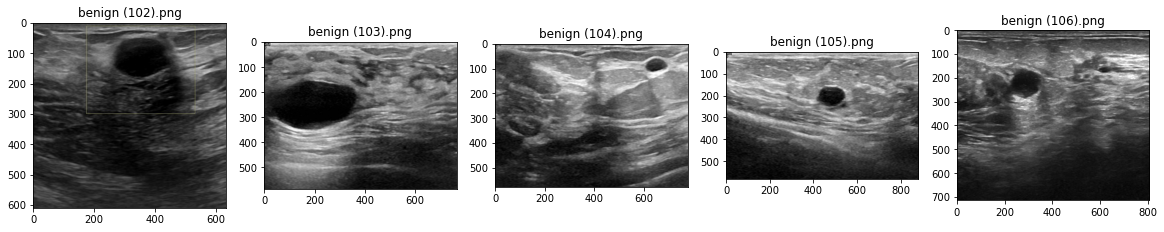

In [9]:
img_folder = r'datasets\breast_cancer_diagnosis\benign'

# Printing five selected ultrasound images from one of the folders (benign)
plt.figure(figsize = (20,20))
count = 0
some_ultrasound = None

#get the selected 5 images
for i in range(19):
    if((i % 2) != 0) and (i > 8):
        file = os.listdir(img_folder)[i]
        image_path = os.path.join(img_folder, file)
        img = mpimg.imread(image_path)        
        ax = plt.subplot(1,5,count+1)
        ax.title.set_text(file)
        plt.imshow(img)
        count += 1
        

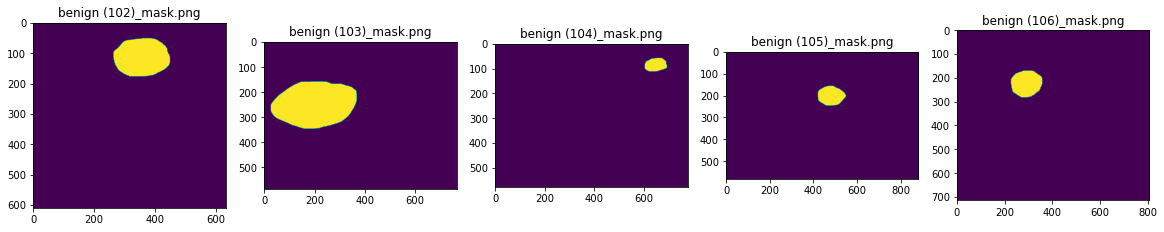

In [10]:
# Printing the ground truth equivalents of the five selected ultrasound images
plt.figure(figsize = (20,20))
count = 0
for i in range(19):
    if((i % 2) == 0) and (i > 8):
        file = os.listdir(img_folder)[i]
        image_path = os.path.join(img_folder, file)
        img = mpimg.imread(image_path)
        ax = plt.subplot(1,5,count+1)
        ax.title.set_text(file)
        plt.imshow(img)
        count += 1

#### Creating the dataset and the labels from the images in the folder
When loading a dataset for the first time, there are several questions you need to ask yourself:
- What kind of data does the dataset contain?  numerical data, categorical data, etc…
- Does the dataset contain any missing or redundant data (noise)?
- Do the values of the features differ over many orders of magnitude? Do we need to standardize or normalize the dataset?

In this case, as the dataset are images, they first need to be loaded and converted to grayscale so that the dimensions are suitable when running the classifier. In addition, they are resized into an spefific width and height, so that all of them have the same size. I chose to downsampled them to 50x50, as it makes handling the dataset efficient, but the images are still quite big. Then, the image is converted into a numpy array (could also have been pandas array), with float 32 as the datatype. Finally, I normalized the image array to have values scaled down between 0 and 1 from 0 to 255 for a similar data distribution, which helps with faster convergence. 

For most image data, the pixel values are integers with values between 0 and 255. However, inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1. 

I didn't have to deal with any missing or redundant data. However, for the sake of simplicity, the ground truth images were not included when creating the dataset (because this would add another dimension to it). But I will consider including them in a future version, as I believe this would improve the machine's performance.

In [11]:
# Setting the image dimensions 
IMG_WIDTH = 50
IMG_HEIGHT = 50

def create_dataset(source_folder):
   
    img_data_array=[]
    class_name=[]
    word = "mask"
   
    for dir1 in os.listdir(source_folder):
        for file in os.listdir(os.path.join(source_folder, dir1)):
            if word not in file: #DELETE this line if using masks  
                # Read the image file from the folder and convert it to the right color format
                image_path = os.path.join(source_folder, dir1,  file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) #grayscale
                
                # Resize the image based on the input dimension required for the model
                image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)

                # Convert the image to a Numpy array
                image = np.array(image)
                image = image.astype('float32')

                # Normalize the image array
                image /= 255

                img_data_array.append(image)
                class_name.append(dir1)
                
    return img_data_array, class_name

# extract the image array and class name from source folder
source_folder = r'datasets\breast_cancer_diagnosis'
img_data, class_name = create_dataset(source_folder)

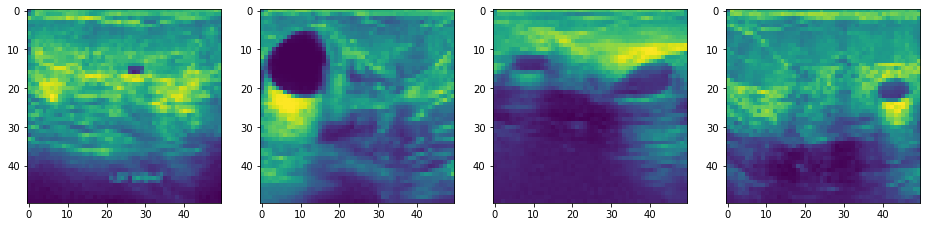

In [12]:
# print first images from the image array
f, axarr = plt.subplots(1,4,figsize = (16, 16))
for k in range(4):
    axarr[k].imshow(img_data[k]) #, mpl.cm.binary

In [13]:
# number of pixels of the images
print(img_data[0].shape)

(50, 50)


#### Converting text labels to numeric codes

In [14]:
#Create a dictionary for all unique values for the classes
target_dict = {k: v for v, k in enumerate(np.unique(class_name))}
print(target_dict)

{'benign': 0, 'malignant': 1, 'normal': 2}


In [15]:
#Convert the class_names to their respective numeric value based on the dictionary
target_val =  [target_dict[class_name[i]] for i in range(len(class_name))]
target_val = np.array(target_val) #convert it to numpy array

#### Converting numeric codes to text labels (for later)

In [16]:
#Create a reverse dictionary from numbers to label for translating the outputs
reverse_dict = {v: k for k, v in target_dict.items()}
print(reverse_dict)

{0: 'benign', 1: 'malignant', 2: 'normal'}


In [17]:
#Convert the numeric values to their respective class_names based on the reverse dictionary
target_name =  [reverse_dict[target_val[i]] for i in range(len(target_val))]
#target_name

### Classification and Performace Measures

#### Splitting the dataset (train and test)
The next step is building and training the actual classifier. For this we need to split the dataset into a training set and a test set. With the training set we will train the classifier, and with the test set we will validate the accuracy of the classifier. Usually a 70-30 ratio is used when splitting into a training and test set, but this ratio should be chosen based on the size of the dataset (the smallest the dataset, the biggest the training ratio). However, after trying different ratios, I decided to stick to the 70-30 ratio for this case.

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_data, target_val, train_size = 0.7)

example_image = x_test[1]

#convert x_train and x_test into numpy array and reshape it into 2d
x_train = np.array(x_train)
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))
x_test = np.array(x_test)
nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))

#### Running Naïve Bayes Classifier 
I chose to use a Gaussian Naive Bayes classifier, as it is based on a continuous distribution, it's easier to understand and it’s suitable for more generic classification tasks than other options.

In [19]:
from sklearn.naive_bayes import GaussianNB #MultinominalNB
from sklearn.metrics import confusion_matrix, classification_report

model = GaussianNB().fit(x_train,y_train)
y_pred = model.predict(x_test)

#### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

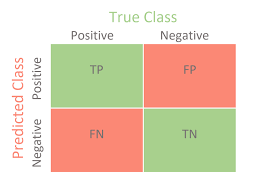

True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this is benign and predicted class tells you the same thing.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this is not malignant and predicted class tells you the same thing.

False positives (FP) and false negatives (FN), these values occur when your actual class contradicts with the predicted class. The goal is to minimize this false predictions as much as possible.

          benign malignant normal
benign        57        46     27
malignant     13        52      5
normal         8        15     11


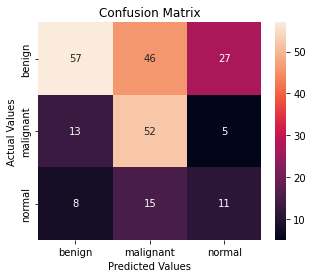

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
labels = list(reverse_dict.values())
cm_df = pd.DataFrame(cm, index = [labels], columns = [labels])
print(cm_df)

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In the matrix above we can see how the number of true positives for benign and malignant classes are quite high, while for normal, there are more benign predicted as normal, than normal predicted as normal. This could be due to the small size of the training dataset for normal class.

#### Precision, Recall and F measure

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.44      0.55       130
           1       0.46      0.74      0.57        70
           2       0.26      0.32      0.29        34

    accuracy                           0.51       234
   macro avg       0.48      0.50      0.47       234
weighted avg       0.58      0.51      0.52       234



Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all ultrasounds labeled as benign, how many are actually benign? High precision relates to the low false positive rate. In this case the precision for benign and malignant, is always aroud 0.7 and 0.6 respectively, which is pretty good. But having a 0.3 precision for normal means that it has more false positives than true ones, which should someone be improved. 

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class. The question recall answers is: of all the ultrasounds that are truly benign, how many did we label? We have got recall above 0.5 for benign and malignant which is good for this model, but as before, normal is not good enough.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. F1 is usually more useful than accuracy. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score around 0.6 in the first two classes and around 0.3 in the last one.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

#### Prediction example

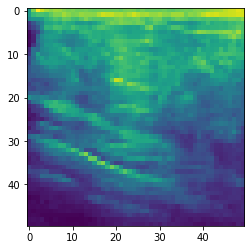

prediction = normal


In [22]:
plt.imshow(example_image)
plt.show()
prediction = model.predict([x_test[1]])
print("prediction =",labels[int(prediction)])

In [23]:
#soft classification indicates the confidence the model has in its prediction (that's why so low when not the predicted)
#taking example above
proba = model.predict_proba(x_test)[1]
print(proba)

[4.49572995e-60 2.29661585e-59 1.00000000e+00]


### Classification with most correlating features
As seen above, the performance of the machine should be improved. One way of doing this, is by finding the most correting features (pixels) of each class and then running the classifier based on this features. However, for simplicity, instead of caculating the most correlating features for each class, I have calculated them all together. Since there are only 3 classes, this probably won’t do too much difference in the final performance. 

#### Finding most correlating features (pixels)

In [24]:
img_data_corr = np.array(img_data)
nsamples, nx, ny = img_data_corr.shape
img_data_corr = img_data_corr.reshape((nx*ny,nsamples))
#print(img_data_corr.shape)

r = np.corrcoef(img_data_corr, target_val)
a = r[-1] #get last column of correlation matrix (pixel against label)

#get top 30 most correlating features and order from highest correlation to lowest
#we don't have into account the first because label against label correlation = 1.0
ind = np.argpartition(a, -35)[-35:] #35 maximum values
max_values = a[ind]
max_values = max_values[::-1] #order them high-low

#find the pixel related to that correlation
t = [[0]*2 for i in range(max_values.size)]
for i in range(0,max_values.size):
    arr = np.where(a == max_values[i])
    index = arr[0]
    t[i][0] = index[0]
    t[i][1] = max_values[i]

#create a pandas dataframe
t = np.array(t)   
df = pd.DataFrame(t, columns=['pixel num.','correlation'])
print(df[:10])

   pixel num.  correlation
0      2500.0     1.000000
1       477.0     0.895815
2      1368.0     0.856771
3       977.0     0.869139
4      1618.0     0.869814
5      1977.0     0.849033
6      1775.0     0.831132
7      2493.0     0.834177
8      1868.0     0.820031
9      2134.0     0.838186


In [25]:
# get pixel row and column
def top(x):
    row=[]
    row = [0 for i in range(x)] 
    column=[]
    column = [0 for i in range(x)] 
    for i in range(0,x):
        j = t[i+1]
        a = j[0]//IMG_WIDTH
        b = j[0]-50*a
        b -= 1
        row[i] = int(a)
        column[i] = int(b)
    return row, column

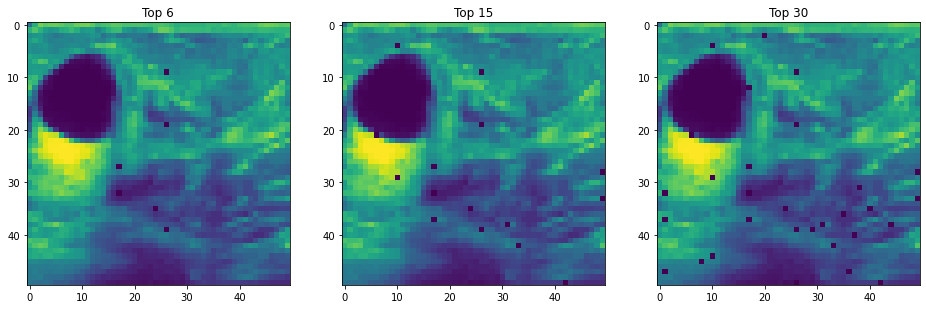

In [26]:
f, axarr = plt.subplots(1,3,figsize = (16, 16))
picture = img_data[1]

#top 6
[row, column] = top(6)
for i in range(0, len(row)):
    picture[row[i],column[i]] = 0
axarr[0].title.set_text('Top 6')
axarr[0].imshow(picture)

#top 15
[row, column] = top(15)
for i in range(0, len(row)):
    picture[row[i],column[i]] = 0
axarr[1].title.set_text('Top 15')
axarr[1].imshow(picture)

#top 30
[row, column] = top(30)
for i in range(0, len(row)):
    picture[row[i],column[i]] = 0
axarr[2].title.set_text('Top 30')
axarr[2].imshow(picture)

plt.show()

Since I have a lot of features and only 3 classes, I decided taking the 6, 15 and 30 best features, as it’s still a small subset of the total (2500) and it improves the performace comparing to taking the 2, 5 and 10 best features.

For example, top 5 vs top 15 - f1 score: benign: 0.74 and 0.68; malignant 0.44 and 0.59; normal 0.0 and 0.40

Here, even if the values for benign class are similar, there is a significant improvement in both malignant and normal f1 scores if we take the top 15 instead of the top 5.

#### Creating datasets (top 6, 15 and 30)

In [27]:
#rezing and creating a pandas dataset
data_features = np.array(img_data)
nsamples, nx, ny = data_features.shape
data_features = data_features.reshape((nsamples,nx*ny))
data_features = pd.DataFrame(data_features)

#Dataset 1 (6 features)
s = list(t[1:7,0])
data_6_features = data_features.loc[:,[s[0],s[1],s[2],s[3],s[4],s[5]]]
print(data_6_features.shape)

#Dataset 2 (15 features)
s = list(t[1:16,0])
data_15_features = data_features.loc[:,[s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11],s[12],s[13],s[14]]]
print(data_15_features.shape)

#Dataset 3 (30 features)
s = list(t[1:31,0])
data_30_features = data_features.loc[:,[s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11],s[12],s[13],s[14],
                                       s[15],s[16],s[17],s[18],s[19],s[20],s[21],s[22],s[23],s[24],s[25],s[26],s[27],
                                       s[28],s[29]]]
print(data_30_features.shape)

(780, 6)
(780, 15)
(780, 30)


#### Running Naïve Bayes in Dataset 1

In [28]:
x_train, x_test, y_train, y_test = train_test_split(data_6_features, target_val, train_size = 0.7)
model = GaussianNB().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       126
           1       0.51      0.68      0.58        73
           2       0.11      0.03      0.05        35

    accuracy                           0.59       234
   macro avg       0.43      0.47      0.44       234
weighted avg       0.54      0.59      0.56       234



In [29]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = [labels], columns = [labels])
print(cm_df)

          benign malignant normal
benign        86        34      6
malignant     21        50      2
normal        20        14      1


#### Running Naïve Bayes in Dataset 2

In [30]:
x_train, x_test, y_train, y_test = train_test_split(data_15_features, target_val, train_size = 0.7)
model = GaussianNB().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59       136
           1       0.47      0.63      0.54        62
           2       0.22      0.33      0.26        36

    accuracy                           0.51       234
   macro avg       0.47      0.49      0.46       234
weighted avg       0.57      0.51      0.52       234



In [31]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = [labels], columns = [labels])
print(cm_df)

          benign malignant normal
benign        68        34     34
malignant     14        39      9
normal        14        10     12


#### Running Naïve Bayes in Dataset 3

In [32]:
x_train, x_test, y_train, y_test = train_test_split(data_30_features, target_val, train_size = 0.7)
model = GaussianNB().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60       118
           1       0.41      0.68      0.51        71
           2       0.44      0.18      0.25        45

    accuracy                           0.52       234
   macro avg       0.50      0.47      0.45       234
weighted avg       0.54      0.52      0.51       234



In [33]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = [labels], columns = [labels])
print(cm_df)

          benign malignant normal
benign        65        44      9
malignant     22        48      1
normal        13        24      8


If we analyse the three classifiers carefully, we can see that when taking only the top 6 features, there are sometimes that it doesn't predict any to be normal and therefore, the f1 score is 0. This most likely happens because I didn't separate the classes when finding the most correlating features and there might not be enough top fetures for normal class. So, the top 6 features classifier is not an improvement compared to the one with all the features (at the beginning).

Then we have classifiers for top 15 and 30 features. After running the code several times I concluded that top 15, 30 and all features classifier have too similar performance measures for me to pick the best one. However, in terms of efficiency top 15 wins. This mantains its performance while having the smallest dataset, which makes it faster to process.

### Conclusions

In conclusion, I believe that the main problem of this dataset is its size. The number of ultrasound images is small in general and  different for each of the classes (133 images for the normal class it is clearly not enough). However, I did not use the ground truth images which I think they could have helped me get more accurate predictions, even if the size of the dataset wouldn't change. In addition, me not dividing the dataset into classes for the most accurate feature extraction wasn't the wisest decision as top 6 feature classifier completely fails when predicting normal.

However, I have learned a lot about this dataset (image datasets) and data manipulation and visualization with this assignment. Futhermore, when we start with a new dataset, we don’t know which classifier will perform best. Therefore, I'm willing to find out if a ensemble classifier like Gradient Boosting or Random Forest, or a classifier which uses a functional approach like Logistic Regression, can overcome the Gaussian Naive Bayes classifier's performance.

## Part 2
### Clustering and Performace Measures

#### Types of clustering
Broadly speaking, clustering can be divided into two subgroups:
- Hard Clustering: In hard clustering, each data point either belongs to a cluster completely or not. For example, each person is put into one group out of the 10 groups. The K-means and Hierarchical clustering I am doing here would fall into this category.
- Soft Clustering: In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned i.e. GMM. For example, each person is assigned a probability to be in either of the 10 groups.

#### Splitting the dataset (train and test)
The next step is building and training the actual classifier. For this we need to split the dataset into a training set and a test set. With the training set we will train the classifier, and with the test set we will validate the accuracy of the classifier. Usually a 70-30 ratio is used when splitting into a training and test set, but this ratio should be chosen based on the size of the dataset (the smallest the dataset, the biggest the training ratio). However, after trying different ratios, I decided to stick to the 70-30 ratio for this case.

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_data, target_val, train_size = 0.7)

example_image = x_test[1]

#convert x_train and x_test into numpy array and reshape it into 2d
x_train = np.array(x_train)
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))
x_test = np.array(x_test)
nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))

#### K-Means (centroid model)
K-means clustering is an unsupervised learning algorithm which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest centroid. The algorithm aims to minimize the squared Euclidean distances between the observation and the centroid of cluster to which it belongs.

I will be using homogeneity score as main metric instead of accuracy. A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

I will comment and compare all the homogeneities for different algorithms in the Performance measures comparison section.

In [35]:
# Fit the classifier
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, accuracy_score
total_clusters =  len(np.unique(y_test)) #try first with number of classes (3)
kmeans = KMeans(n_clusters=total_clusters, random_state=42)
kmeans.fit(x_train)
print("homogeneity score = ", homogeneity_score(y_train, kmeans.labels_))

homogeneity score =  0.03175981848673673


In [36]:
# Method to get predicted values from .labels_
from scipy.stats import mode
def get_labels(cluster_y, y_train):
    labels = np.zeros(len(y_train))
    for i in range(len(cluster_y)):
        cat = (cluster_y == i)
        labels[cat] = mode(y_train[cat])[0]
    return labels   

In [37]:
# Comparing Predicted values and Actual values
kmeans_labels = get_labels(kmeans.labels_, y_train)
print('Predicted = ', kmeans_labels[:20].astype('int'))
print('Actual = ', y_train[:20])

Predicted =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual =  [0 0 0 0 1 0 1 0 0 2 0 0 0 1 2 1 0 0 0 0]


#### Hierarchical Clustering (connectivity model)
Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left (see Dendrograms below).

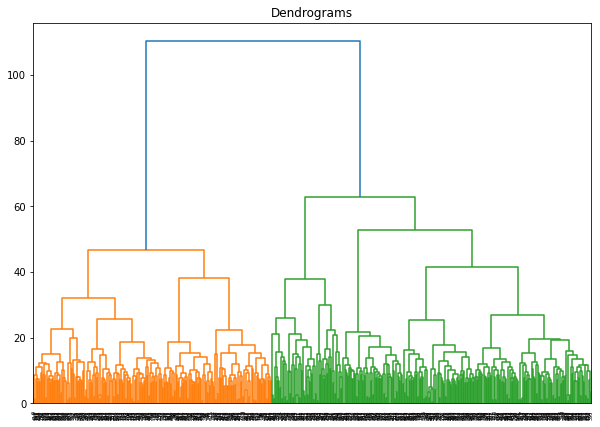

In [38]:
# Plot Dendrograms
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(x_train, method='ward'))

At the bottom, we start with 546 data points, each assigned to separate clusters. Two closest clusters are then merged till we have just one cluster at the top. The height in the dendrogram at which two clusters are merged represents the distance between two clusters in the data space.

The decision of the number of clusters that can best depict different groups can be chosen by observing the dendrogram. The best choice of the number of clusters is the number of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.

In the above example, the best choice of number of clusters will be 2 or 3 (depending on the time). However, this doesn't mean a high homogeneity score.

In [39]:
# Fit classifier
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=total_clusters, affinity='euclidean', linkage='ward')  
hierarchical.fit(x_train)
print("homogeneity score = ", homogeneity_score(y_train, hierarchical.labels_))

homogeneity score =  0.017824655225162914


In [40]:
# Comparing Predicted values and Actual values
hierarchical_labels = get_labels(hierarchical.labels_, y_train)
print('Predicted = ',hierarchical_labels[:20].astype('int'))
print('Actual = ',y_train[:20])

Predicted =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual =  [0 0 0 0 1 0 1 0 0 2 0 0 0 1 2 1 0 0 0 0]


#### Expectation-Maximization Algorithm (distribution model)
The expectation-maximization algorithm is an approach for performing maximum likelihood estimation in the presence of latent data, i.e. unobserved. It is an effective and general approach and is most commonly used for density estimation with missing data (latent data), such as the clustering algorithms like the Gaussian Mixture Model I am going to be using here. This is a probabilistic model that uses the soft clustering approach for distributing the points in different clusters.

In [41]:
# General EM for GMM
from sklearn.mixture import GaussianMixture
#fit the classifier and predict
gmm = GaussianMixture(n_components = total_clusters)
gmm_y = gmm.fit_predict(x_train) # fit_predict because GaussianMixture doesn't have .labels_
print("homogeneity score = ", homogeneity_score(y_train, gmm_y))

homogeneity score =  0.025248492816578753


In [42]:
# Comparing Predicted values and Actual values
gmm_labels = get_labels(gmm_y, y_train)
print('Predicted = ',gmm_labels[:20].astype('int'))
print('Actual = ',y_train[:20])

Predicted =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual =  [0 0 0 0 1 0 1 0 0 2 0 0 0 1 2 1 0 0 0 0]


#### Performance measures comparison

In [43]:
# K-means metrics calculation/printing method
def calculate_metrics(model,output):
    print('Number of clusters is ', format(model.n_clusters))
    print('Inertia: ', format(model.inertia_))
    print('Homogeneity: ', format(homogeneity_score(output,model.labels_)))

In [44]:
# Print metrics for different algorithms
from sklearn.metrics import classification_report
print("K-MEANS")
calculate_metrics(kmeans, y_train)

print("\nHIERARCHICAL CLUSTERING")
print('Number of clusters is ', format(hierarchical.n_clusters))
print('Homogeneity: ', format(homogeneity_score(y_train,hierarchical.labels_)))

print("\nEM ALGORITHM")
print('Homogeneity: ', format(homogeneity_score(y_train,gmm_y)))

K-MEANS
Number of clusters is  3
Inertia:  27897.16796875
Homogeneity:  0.03175981848673673

HIERARCHICAL CLUSTERING
Number of clusters is  3
Homogeneity:  0.017824655225162914

EM ALGORITHM
Homogeneity:  0.025248492816578753


All the homogeneities are very low and not useful for good prediction, even if they vary slightly. This could be due to the low number of clusters/components (total_clusters = 3) when creating the classifiers, which leads clusters to contain data points of different classes (very big/general clusters).
However, there are several ways to optimize this number (see next section).

### Optimizing the algorithm 
#### Changing the number of clusters manually (K-Means)


In [45]:
from sklearn import metrics

distortions = []
cluster_number = [10,16,36,64,144,256,400,450,500,540] #it can't be more than number of samples (546)

for i in cluster_number:
    # Initialize the K-Means model
    kmeans = KMeans(n_clusters = i)
    
    # Fitting the model to training set and calculating distorsion (for elbow method)
    kmeans_y = kmeans.fit(x_train)
    distortions.append(kmeans.inertia_)
    
    # Calculating the metrics
    calculate_metrics(kmeans, y_train)
    print("")

Number of clusters is  10
Inertia:  22538.271484375
Homogeneity:  0.06413504900219348

Number of clusters is  16
Inertia:  21054.36328125
Homogeneity:  0.11225469610131815

Number of clusters is  36
Inertia:  18179.189453125
Homogeneity:  0.16911283815788403

Number of clusters is  64
Inertia:  15378.1162109375
Homogeneity:  0.2588398037854296

Number of clusters is  144
Inertia:  10180.9384765625
Homogeneity:  0.48189434498623557

Number of clusters is  256
Inertia:  5371.74169921875
Homogeneity:  0.696899398955366

Number of clusters is  400
Inertia:  1158.7822265625
Homogeneity:  0.9157850945286048

Number of clusters is  450
Inertia:  235.2091064453125
Homogeneity:  0.986070007648013

Number of clusters is  500
Inertia:  36.14379119873047
Homogeneity:  0.9922286538008783

Number of clusters is  540
Inertia:  0.9889326691627502
Homogeneity:  0.9948191025339189



Here, we can observe how the homogeneity increases as the number of clusters grows. Nevertheless, there is a point were this increase slows down and that's where we are interested. This is called the elbow method.

#### Elbow Method

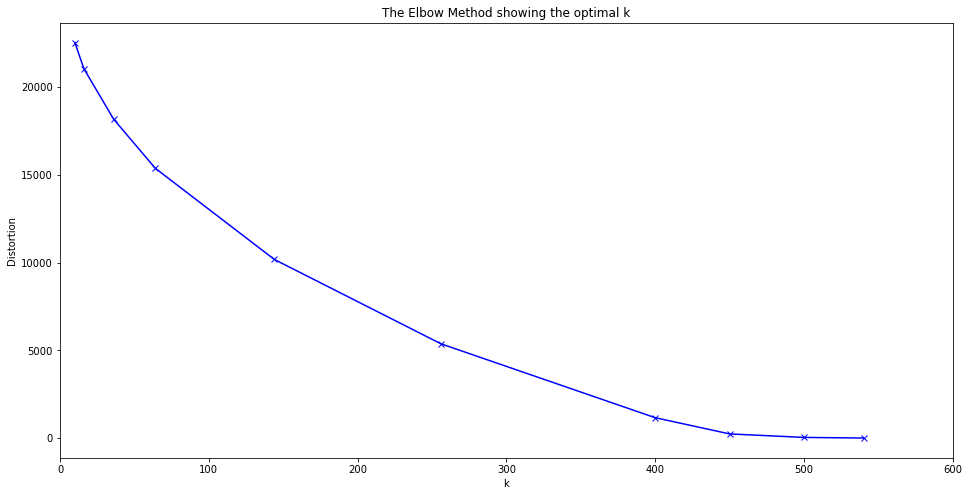

In [46]:
# Plotting elbow method
plt.figure(figsize=(16,8))
plt.plot(cluster_number, distortions, 'bx-')
plt.xlim(0,600)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the “elbow” is the number 450 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 450.

#### Optimal number of clusters

In [47]:
# Fit classifier with optimal cluster number
total_clusters = 450
kmeans = KMeans(n_clusters=total_clusters, random_state=42)
kmeans.fit(x_train)

# Metrics
print("K-MEANS")
calculate_metrics(kmeans, y_train)

K-MEANS
Number of clusters is  450
Inertia:  235.66372680664062
Homogeneity:  0.986070007648013


In [48]:
# Comparing Predicted values and Actual values
kmeans_labels = get_labels(kmeans.labels_, y_train)
print(kmeans_labels[:20].astype('int'))
print(y_train[:20])

[0 0 0 0 1 0 1 0 0 2 0 0 0 1 2 1 0 0 0 0]
[0 0 0 0 1 0 1 0 0 2 0 0 0 1 2 1 0 0 0 0]


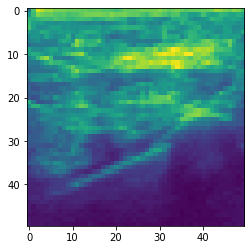

prediction = benign


In [49]:
# Test set prediction example
pred = kmeans.predict(x_test)
kmeans_pred = get_labels(pred, y_test)

# Plot image and print prediction
plt.imshow(example_image) # example image = x_test[1]
plt.show()
dictionary = list(reverse_dict.values())
prediction = y_pred[1].astype('int')
print("prediction =", dictionary[int(prediction)])

The metrics of this predicition (test set) will be later analysed in the Comparing K-Means clustering to Bayesian classification section.

### Conclusions
#### Differences between clustering algorithms
- Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K-Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).
- K-Means clustering requires prior knowledge of the number of clusters. But, you can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram.
- All of them are very simple to implement.
- Cluster assignment is much more flexible in GMM than in K-Means clustering. With GMM, each cluster can have unconstrained covariance structure. Think of rotated and/or elongated distribution of points in a cluster, instead of spherical as in K-Meas clustering.
- In K-means (hard clustering), a point belongs to one and only one cluster, whereas in GMM (soft clustering) a point belongs to each cluster to a different degree. Depending on the task, mixed membership may be more appropriate (e.g. news articles can belong to multiple topic clusters) or not (e.g. organisms can belong to only one species).

#### Comparing K-Means clustering to Bayesian classification
Eventhough one is unsupervised and the other one is supervised, and the way of validating, interpreting and benchmarking the results are completely different, I tried to compute the same metrics so they can be somehow comparable.

In [50]:
#fit GaussianNB classifier and predict with test set
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(x_train,y_train)
y_pred = model.predict(x_test)

In [51]:
from sklearn.metrics import classification_report
print("K-MEANS:")
print(classification_report(y_test, kmeans_pred))
print("NAIVE BAYES CLASSIFIER:")
print(classification_report(y_test, y_pred))

K-MEANS:
              precision    recall  f1-score   support

           0       0.67      0.98      0.80       133
           1       0.76      0.37      0.50        59
           2       1.00      0.24      0.38        42

    accuracy                           0.70       234
   macro avg       0.81      0.53      0.56       234
weighted avg       0.75      0.70      0.65       234

NAIVE BAYES CLASSIFIER:
              precision    recall  f1-score   support

           0       0.79      0.50      0.61       133
           1       0.43      0.68      0.52        59
           2       0.24      0.31      0.27        42

    accuracy                           0.51       234
   macro avg       0.48      0.50      0.47       234
weighted avg       0.60      0.51      0.53       234



As it can be seen K-Means clustering outperforms Naive Bayes Classifier most of the times. Where prediction for benign and normal ultrasounds is better with K-Means, but NB is usually better with malignant cases. However, this conclusion can be a little bit misleading, as I have optimized K-means clustering, whereas Naive Bayes Classifier hasn't been improved yet.

In addition, the f1-scores in both cases are lower than I expected. This could be due to the dataset size. The number of ultrasound images is small in general and different for each of the classes (133 images for the normal class it is clearly not enough). However, I did not use the ground truth images which I think they could have helped me get more accurate predictions. 
Besides, the train-test set ratio could also be changed.

## Part 3
### Classification and Performace Measures

#### Splitting the dataset (train and test)
The next step is building and training the actual classifier. For this we need to split the dataset into a training set and a test set. With the training set we will train the classifier, and with the test set we will validate the accuracy of the classifier. Usually a 70-30 ratio is used when splitting into a training and test set, but this ratio should be chosen based on the size of the dataset (the smallest the dataset, the biggest the training ratio). However, as we are going to be changing the ratio later on, let's start with 70-30.

In [52]:
def convert2d(arr):
    arr = np.array(arr)
    nsamples, nx, ny = arr.shape
    arr = arr.reshape((nsamples,nx*ny))
    return arr

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_data, target_val, train_size = 0.7) #70-30 ratio
example_image = x_test[1]
x_train = convert2d(x_train)
x_test = convert2d(x_test)

#### Running J48 Classifier
We run the the decission tree classifier. However, comparing to other machine learning algorithms, decision trees can easily overfit. So, later I will show different ways to prevent this.

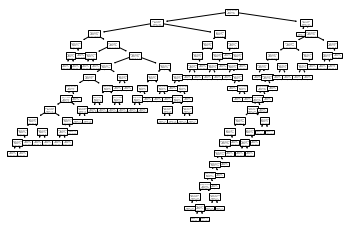

In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(x_train,y_train)
plot_tree(tree_clf);

#### Major Metrics (using 10-fold cross-validation)
We can measure the accuracy on the training set using 10-fold cross-validation.

In [55]:
from sklearn.model_selection import KFold, cross_val_predict
from numpy import mean

cv = KFold(n_splits=10, random_state=1, shuffle=True)
y_cross = cross_val_predict(tree_clf, x_train, y_train, cv=cv, n_jobs=-1)
print('Accuracy:', accuracy_score(y_train, y_cross))

Accuracy: 0.6025641025641025


In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = list(reverse_dict.values())

def get_matrix(actual, pred, labels):
    cm = confusion_matrix(actual, pred)
    cm_df = pd.DataFrame(cm, index = [labels], columns = [labels])
    print(cm_df)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

          benign malignant normal
benign       210        50     42
malignant     51        84     15
normal        45        14     35


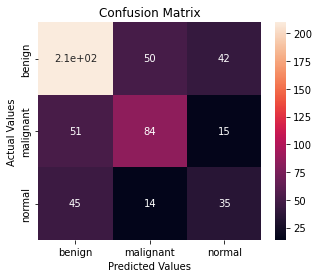

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       302
           1       0.57      0.56      0.56       150
           2       0.38      0.37      0.38        94

    accuracy                           0.60       546
   macro avg       0.54      0.54      0.54       546
weighted avg       0.60      0.60      0.60       546



In [57]:
get_matrix(y_train, y_cross, labels)
print(classification_report(y_train, y_cross))

As we can observe the cross-validation accuracy is around 0.5, which at first sight already seems low (as well as the other metrics). However, we won't know much about overfitting until we see how the model performs with unseen data (test set).

#### Major Metrics (using test set)
We can also test the classifier using the test dataset.

In [58]:
#Traning data (seen data)
print('Train set accuracy: ', tree_clf.score(x_train,y_train))

Train set accuracy:  0.9981684981684982


          benign malignant normal
benign        92        25     18
malignant     26        21     13
normal        19         6     14


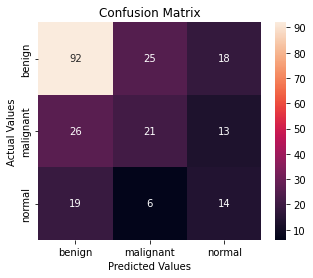

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       135
           1       0.40      0.35      0.38        60
           2       0.31      0.36      0.33        39

    accuracy                           0.54       234
   macro avg       0.46      0.46      0.46       234
weighted avg       0.54      0.54      0.54       234



In [59]:
#Testing data (unseen data)
y_pred = tree_clf.predict(x_test)
get_matrix(y_test, y_pred, labels)
print(classification_report(y_test, y_pred))

Overfitting refers to the condition when the model completely fits the training data but fails to generalize the testing unseen data. Overfit condition arises when the model memorizes the noise of the training data and fails to capture important patterns. Therefore, a decision tree is overfitted if it gives highly accurate output on training data, but low accurate output on test data.

In our case, the accuracy of the train set is around 100% while the test set has around 60% accuracy, so we can assume it's failing to generalize well the new data (there is overfitting).

However, there are ways to prevent this.

### Changing Parameters

#### Pruning (changing the size of the tree)

The pre-pruning technique refers to the early stopping of the growth of the decision tree. The pre-pruning technique involves tuning the hyperparameters of the decision tree model prior to the training pipeline. The hyperparameters of the decision tree including max_depth, min_samples_leaf, min_samples_split can be tuned to early stop the growth of the tree and prevent the model from overfitting.

After manually changing the parameters several times I found out that the best-fit decision tree is at a max depth value of 3. Increasing the max depth value further could cause an overfitting problem.

However, I used the sklearn implementation of the GridSearchCV technique to find the best set of hyperparameters for the decision tree model. This searches for the ideal hyperparamenters based on the cross-validation accuracy score.

In addition, post-pruning could be performed as well. The Post-pruning technique allows the decision tree model to grow to its full depth, then removes the tree branches to prevent the model from overfitting. Cost complexity pruning (ccp) is one type of post-pruning technique. In case of cost complexity pruning, the ccp_alpha can be tuned to get the best fit model. However, I didn't include this, as the running time got to high when comparing between all the 60 alternatives for cpp_alpha.

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [2,3,5,10,15,20,50,100],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5,7,10],
}

clf_pruned = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf_pruned, param_grid, scoring = "accuracy", n_jobs=-1, cv=3).fit(x_train, y_train)
print("Best hyperparameters", grid_cv.best_params_)
print("Accuracy (cross-validation):", grid_cv.best_score_)

Best hyperparameters {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy (cross-validation): 0.5879120879120879


Train set accuracy:  0.9340659340659341
Test set accuracy:  0.5683760683760684


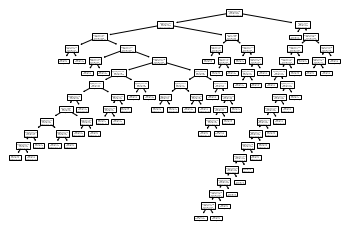

In [61]:
#running a classifier with the best hyperparameters
depth, leaf, split = list(grid_cv.best_params_.values())
clf_pruned = DecisionTreeClassifier(random_state = 42, max_depth = depth,
                                    min_samples_leaf = leaf, min_samples_split = split, splitter = "best")
clf_pruned.fit(x_train, y_train)
print('Train set accuracy: ', clf_pruned.score(x_train,y_train))
print('Test set accuracy: ', clf_pruned.score(x_test,y_test))
plot_tree(clf_pruned);

As it can be seen, the accuracy of the test set (around 60%) is almost the same as before (it may have slightly decreased), but the train set accuracy has drop to around 70%. So, even though there is maybe some overfitting yet, it's definetely less, as there is not much difference between both accuracies.

#### Changing training and test set to 40-60 ratio
We could also see what happens if we change the train and test sets ratio. In this case I decided to use a 40-60 ratio and a pruned decision tree so the results can be more comparable.

In [62]:
x_train, x_test, y_train, y_test = train_test_split(img_data, target_val, train_size = 0.4)
example_image = x_test[1]
x_train = convert2d(x_train)
x_test = convert2d(x_test)

In [63]:
clf_pruned = DecisionTreeClassifier(random_state = 42, max_depth = depth, 
                                   min_samples_leaf = leaf, min_samples_split = split, splitter = "best")
clf_pruned.fit(x_train, y_train)
print('Train set accuracy: ', clf_pruned.score(x_train,y_train))
print('Test set accuracy: ', clf_pruned.score(x_test,y_test))

Train set accuracy:  0.9391025641025641
Test set accuracy:  0.5299145299145299


As it can be observed, the test set accuracy has decreased, but this is normal as the model has less data to train with. However, it's interesting how there is no much difference between both accuracies, which implies that there is small overfitting.

#### Changing training and test set to 10-90 ratio

In [64]:
x_train, x_test, y_train, y_test = train_test_split(img_data, target_val, train_size = 0.1)
example_image = x_test[1]
x_train = convert2d(x_train)
x_test = convert2d(x_test)

In [65]:
clf_pruned = DecisionTreeClassifier(random_state = 42, max_depth = depth, 
                                    min_samples_leaf = leaf, min_samples_split = split, splitter = "best")
clf_pruned.fit(x_train,y_train)
print('Train set accuracy: ', clf_pruned.score(x_train,y_train))
print('Test set accuracy: ', clf_pruned.score(x_test,y_test))

Train set accuracy:  0.9358974358974359
Test set accuracy:  0.4358974358974359


In this case, the test set score has also decreased, as I only allocated 10% of the dataset to the training set. However, it's failing to generalize well the new data as the difference between both accuracies has increased. This could be due to the lack of enough data in the train set, which makes the model fail when finding the important patterns.

### Extra - Random Forests
Random Forest is an ensemble technique for classification and regression by bootstrapping multiple decision trees. Random Forest follows bootstrap sampling and aggregation techniques to prevent overfitting.

#### Splitting the dataset (train and test)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(img_data, target_val, train_size = 0.7) #70-30 ratio
x_train = convert2d(x_train)
x_test = convert2d(x_test)

#### Running Random Forests Classifier and Mayor Metrics (using test set)
I have skipped the 10 fold cross-validation part, as I find using the test set more interesting to analyse overfitting.

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10) #random n_estimators value
rf.fit(x_train, y_train)
print('Train set accuracy: ', rf.score(x_train,y_train))

Train set accuracy:  0.9816849816849816


          benign malignant normal
benign       111        14      4
malignant     37        27      1
normal        23         2     15


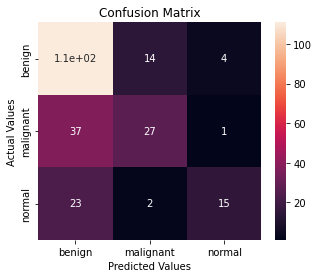

              precision    recall  f1-score   support

           0       0.65      0.86      0.74       129
           1       0.63      0.42      0.50        65
           2       0.75      0.38      0.50        40

    accuracy                           0.65       234
   macro avg       0.68      0.55      0.58       234
weighted avg       0.66      0.65      0.63       234



In [68]:
y_pred = rf.predict(x_test)
get_matrix(y_test, y_pred, labels)
print(classification_report(y_test, y_pred))

There is overfitting as well. The train set accuracy is around 100% while the test set one is around 60%, which is a big difference. However, we can further tune the hyperparameters of the Random Forest algorithm to improve the performance of the model. In theory, n_estimator parameter can be tuned to reduce the overfitting of the model.

#### Changing the size of the forest/tree

In [69]:
param_grid = {
    "n_estimators": [1, 5, 10, 20, 50, 100, 150, 200],
    "max_depth": [2, 3, 10, 20, 50, 100, None]
}

clf_pruned = RandomForestClassifier(random_state=42)
grid_cv = GridSearchCV(clf_pruned, param_grid, scoring = "accuracy", n_jobs=-1, cv=3).fit(x_train, y_train)
print("Best hyperparameters", grid_cv.best_params_)
print("Accuracy (cross validation):", grid_cv.best_score_)

Best hyperparameters {'max_depth': 10, 'n_estimators': 150}
Accuracy (cross validation): 0.663003663003663


In [70]:
# Running classifier with best hyperparameters
depth, n = list(grid_cv.best_params_.values())
clf_pruned = RandomForestClassifier(random_state = 42, max_depth = depth, n_estimators = n)
clf_pruned.fit(x_train, y_train)
print('Train set accuracy: ', clf_pruned.score(x_train,y_train))
print('Test set accuracy: ', clf_pruned.score(x_test,y_test))

Train set accuracy:  0.9981684981684982
Test set accuracy:  0.7051282051282052


Suprisingly, the accuracy difference has not dropped, which means there is still overfitting. This could be because the range of values compared in the GridSearchCV do not prevent overfitting. Or maybe I should use another comparison pararameter, other than "accuracy" in the GridSearchCV.

#### Changing training and test set to 40-60 ratio

In [71]:
x_train, x_test, y_train, y_test = train_test_split(img_data, target_val, train_size = 0.4)
example_image = x_test[1]
x_train = convert2d(x_train)
x_test = convert2d(x_test)

In [72]:
clf_pruned = RandomForestClassifier(random_state = 42, n_estimators = n, max_depth = depth)
clf_pruned.fit(x_train,y_train)
print('Train set accuracy: ', clf_pruned.score(x_train,y_train))
print('Test set accuracy: ', clf_pruned.score(x_test,y_test))

Train set accuracy:  0.9967948717948718
Test set accuracy:  0.7136752136752137


As in the decision tree classifier, the test set accuracy has decreased, because the training set is smaller. However, as the forest hasn't been pruned correctly before, there is still a high overfitting. Same for the 10-90 ratio.

#### Changing training and test set to 10-90 ratio

In [73]:
x_train, x_test, y_train, y_test = train_test_split(img_data, target_val, train_size = 0.1)
example_image = x_test[1]
x_train = convert2d(x_train)
x_test = convert2d(x_test)

In [74]:
clf_pruned = RandomForestClassifier(random_state = 42, n_estimators = n, max_depth = depth)
clf_pruned.fit(x_train,y_train)
print('Train set accuracy: ', clf_pruned.score(x_train,y_train))
print('Test set accuracy: ', clf_pruned.score(x_test,y_test))

Train set accuracy:  1.0
Test set accuracy:  0.5925925925925926


## Part 4
### Linear classifier - Logistic Regression

In [75]:
# Splitting the dataset (train and test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_data, target_val, train_size = 0.9)

example_image = x_test[1]

#convert x_train and x_test into numpy array and reshape it into 2d
x_train = np.array(x_train)
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))
x_test = np.array(x_test)
nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))

Linear classifiers classify data into labels based on a linear combination of input features. Therefore, these classifiers separate data using a line or plane or a hyperplane (a plane in more than 2 dimensions). They can only be used to classify data that is linearly separable. So, let's see if this dataset is linearly separable.

In [76]:
# Fit the classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_clf = LogisticRegression(random_state = 42)

In [77]:
# With 10-fold cross-validation
from sklearn.model_selection import KFold, cross_val_predict
from numpy import mean

cv = KFold(n_splits=10, random_state=1, shuffle=True)
y_cross = cross_val_predict(lr_clf, x_train, y_train, cv=cv, n_jobs=-1)
print('Accuracy cross-validation:', accuracy_score(y_train, y_cross))

Accuracy cross-validation: 0.7008547008547008


In [78]:
# Without 10-fold cross-validation
lr_clf.fit(x_train,y_train)
y_pred = lr_clf.predict(x_train)
print('Accuracy train:', accuracy_score(y_train, y_pred))

Accuracy train: 0.9914529914529915


In [79]:
# On test set
y_pred = lr_clf.predict(x_test)
print('Accuracy test:', accuracy_score(y_test, y_pred))

Accuracy test: 0.6538461538461539


This image dataset is clearly linearly separable, but the separation is useless. Images usually live in a high-dimensional space, and as long as you have more features (50x50) than samples (780 max.) everything is linearly separable. However, the separation is useless since it will not extend to the testing set (it doesn't talk about generalization).

By looking to the accuracies, we can see there is strong overfitting, as the accuracy in the training set is almost 100% and the test set's one is around 70%. This means that the classifier does not genelize well to the new data. One possible solution could be changing the hyperparameters such as the max_iter to a lower value for example (see below).

However, if I had to compare between classifiers, the easiest way of knowing which generalizes best is looking to the cross-validation accuracy.

In [80]:
lr_clf = LogisticRegression(max_iter = 10,random_state = 42)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
y_cross = cross_val_predict(lr_clf, x_train, y_train, cv=cv, n_jobs=-1)
print('Accuracy cross-validation:', accuracy_score(y_train, y_cross))
lr_clf.fit(x_train,y_train)
y_pred = lr_clf.predict(x_train)
print('Accuracy train:', accuracy_score(y_train, y_pred))
y_pred = lr_clf.predict(x_test)
print('Accuracy test:', accuracy_score(y_test, y_pred))

Accuracy cross-validation: 0.6396011396011396
Accuracy train: 0.6695156695156695
Accuracy test: 0.5769230769230769


### Multi Layer Perceptron
Multi layer perceptron (MLP) is a supplement of feed forward neural network. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. MLPs are designed to approximate any continuous function and can solve problems which are not linearly separable. 

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# optimize hyperparameters
param_grid = {
    "activation": ['logistic', 'tanh', 'relu'],
    "hidden_layer_sizes": [(1),(1,2),(3,2),(5,4),(1,6)],
    "learning_rate_init": [0.01,0.1,0.5],
    "max_iter": [10,20,30,50,100],
}

mlp = MLPClassifier(random_state=1, momentum = 0.8, early_stopping = True, validation_fraction = 0.3)
grid_cv = GridSearchCV(mlp, param_grid, scoring = "accuracy", n_jobs=-1, cv=3).fit(x_train, y_train)
print("Best hyperparameters", grid_cv.best_params_)
print("Accuracy (cross-validation):", grid_cv.best_score_)

Best hyperparameters {'activation': 'relu', 'hidden_layer_sizes': (1, 2), 'learning_rate_init': 0.01, 'max_iter': 50}
Accuracy (cross-validation): 0.6396011396011395


In [82]:
# get optimized hyperparameters from GridSearchCV
act, hidden, lr, epochs = list(grid_cv.best_params_.values())

# fit the classifier
# activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
mlp = MLPClassifier(activation = act, hidden_layer_sizes = hidden, learning_rate_init = lr, max_iter = epochs,
                    momentum = 0.8, early_stopping = True, validation_fraction = 0.3, random_state=1)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_train)
print('Accuracy train:', accuracy_score(y_train, y_pred))
y_pred =  mlp.predict(x_test)
print('Metrics test:')
print(classification_report(y_test, y_pred))

Accuracy train: 0.6652421652421653
Metrics test:
              precision    recall  f1-score   support

           0       0.53      0.95      0.68        37
           1       0.75      0.36      0.49        25
           2       0.00      0.00      0.00        16

    accuracy                           0.56        78
   macro avg       0.43      0.44      0.39        78
weighted avg       0.49      0.56      0.48        78



All layers of the neural network will collapse into one if a linear ('identity') activation function is used. No matter the number of layers in the neural network, the last layer will still be a linear function of the first layer. So, essentially, a linear activation function turns the neural network into just one layer (single layer perceptron).

We also know that if a single perceptron fails to solve the problem, the data is linearly inseparable. However, in this case, when we run the accuracy score of the test set using 'identity', we get around 65% accuracy, which implies the data is linearly separable.

In addition, sklearn MLPClassifier allows you to switch between non-linear activation functions as well (logistic, tanh and relu). This type of functions allow the model to create complex mappings between the network’s inputs and outputs, which are essential for learning and modeling complex data, such as images, video, audio, and datasets which are non-linear or have high dimensionality. In this case, all activations fuctions perform great with the dataset, but ReLu (the most used activation function in the world right now) gets the highest accuracy, as sigmoid and tanh functions could be facing vanishing gradients.
In addition, the model trained with ReLu also experiences improvement in terms of the convergence speed.
 
In terms of capacity, a model with less capacity may not be able to sufficiently learn the training dataset. Whereas a model with too much capacity may memorize the training dataset and fail to generalize or get lost or stuck in the search for a suitable mapping function. Therefore, I optimized the hyperparameters using GridSearchCV (see above) so that this doesn't happen to our model. Thanks to this, the accuracy difference between the training and the testing sets is minimal.

### Convolutional Neural Networks

In [83]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(img_data, target_val, train_size = 0.7)

#reshape so that fits the CNN
print(x_train[0].shape)
x_train = np.array(x_train)
x_train = x_train.reshape((len(x_train),50, 50, 1))
print(x_train[0].shape)

x_test = np.array(x_test)
x_test = x_test.reshape((len(x_test),50, 50, 1))

(50, 50)
(50, 50, 1)


A convolutional neural network (CNN) is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data. A CNN uses a system much like a multilayer perceptron that has been designed for reduced processing requirements. The layers of a CNN consist of an input layer, an output layer and a hidden layer that includes multiple convolutional layers, pooling layers and fully connected layers. If we are performing multiclass classification, the output is softmax.

In [84]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam

#parameters
conv_layers = [1, 2, 3] 
feature_maps = [32, 64] 
dense_layers = [1, 2] 
layer_sizes = [128, 256]

inputs = tf.keras.Input(shape=(50, 50, 1))
prev_diff = 100
prev_acc = 0

for i in conv_layers:
    for k in feature_maps:
        for j in dense_layers:
            for l in layer_sizes:
                x = inputs
                #create network alternating between convolutional and pooling layers
                for o in range(i):
                    x = tf.keras.layers.Conv2D(k, (3,3), activation='relu')(x)
                    x = tf.keras.layers.MaxPooling2D(2,2)(x)
                x = tf.keras.layers.Flatten()(x)
                for n in range(j-1):
                    x = tf.keras.layers.Dense(l, activation='relu')(x)
                outputs = tf.keras.layers.Dense(l, activation='softmax')(x)
                
                model = tf.keras.Model(inputs, outputs)
                model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                #model.summary()
                
                #fit model
                model.fit(x_train, y_train, epochs=5, verbose=0) #remove verbose = 0 to see epochs
                
                #print accuracies
                train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=0)
                test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
                print("conv layers:", i, "- feature maps:", k, "- dense layers:", j, "- layer sizes:", l,
                      "---> acc train:", round(train_acc,4), "- acc test:", round(test_acc,4))
                
                #set the best option taking into account generalization and accuracy
                diff = abs(train_acc - test_acc)
                if diff < prev_diff and test_acc > prev_acc:
                    prev_diff = diff
                    prev_acc = test_acc
                    params = [i, k, j, l, train_acc, test_acc]
                    

[i, k, j, l, train_acc, test_acc] = params
print("Best hyperparameters:")
print("conv layers:", i, "- feature maps:", k, "- dense layers:", j, "- layer sizes:", l,
      "---> acc train:", round(train_acc,4), "- acc test:", round(test_acc,4))

conv layers: 1 - feature maps: 32 - dense layers: 1 - layer sizes: 128 ---> acc train: 0.685 - acc test: 0.6624
conv layers: 1 - feature maps: 32 - dense layers: 1 - layer sizes: 256 ---> acc train: 0.663 - acc test: 0.6581
conv layers: 1 - feature maps: 32 - dense layers: 2 - layer sizes: 128 ---> acc train: 0.7308 - acc test: 0.6624
conv layers: 1 - feature maps: 32 - dense layers: 2 - layer sizes: 256 ---> acc train: 0.6905 - acc test: 0.6624
conv layers: 1 - feature maps: 64 - dense layers: 1 - layer sizes: 128 ---> acc train: 0.7363 - acc test: 0.5897
conv layers: 1 - feature maps: 64 - dense layers: 1 - layer sizes: 256 ---> acc train: 0.6813 - acc test: 0.6667
conv layers: 1 - feature maps: 64 - dense layers: 2 - layer sizes: 128 ---> acc train: 0.7637 - acc test: 0.6795
conv layers: 1 - feature maps: 64 - dense layers: 2 - layer sizes: 256 ---> acc train: 0.6319 - acc test: 0.6197
conv layers: 2 - feature maps: 32 - dense layers: 1 - layer sizes: 128 ---> acc train: 0.641 - acc

As you can see, I created a loop so that I can test different hyperparameter combinations. I optimized the hyperparameters taking into account generalization to new data and test set accuracy score. So, after running it, the accuracy difference between the training and the testing sets is minimal, while the test set accuracy is maintained high.

In addition, this loop would allow me to test more hyperparameters, such as epochs (set to 5) or activation functions (set to ReLu). This would further change the accuracy (as seen in the previous section). However, to keep things simple, I decided to stick to the ones I tune above.